<a href="https://colab.research.google.com/github/etalab-ia/ami-ia/blob/master/notebooks/ami_ia_dataviz_rr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Premiers pas avec Jupyter Notebook et Pandas 

Objectifs: 
  - charger un jeu de données de data.gouv
  - obtenir quelques statistiques basiques sur le jeu de données
  - visualiser les données 
  - nettoyer les données 
  - visualiser des données géo 


  Un exemple avec le jeu de données Alim'Confiance de datagouv à télécharger [ici](https://dgal.opendatasoft.com/explore/dataset/export_alimconfiance/export/?disjunctive.app_libelle_activite_etablissement&disjunctive.filtre&disjunctive.ods_type_activite) 

In [1]:
# importer les librairies dont on aura besoin 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [2]:
# lire le jeu de données en un objet "pandas dataframe"
#df = pd.read_csv("https://dgal.opendatasoft.com/explore/dataset/export_alimconfiance/download/?format=csv&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B", sep = ";", header = 0)

# lire le jeu de données en un objet "pandas dataframe"
df = pd.read_csv('../data/export_alimconfiance.csv', sep = ";", header = 0)

In [3]:
# commande qui permet de visualiser les n premieres lignes d'une dataframe (5 par défaut)
df.head()

,APP_Libelle_etablissement,SIRET,Code_postal,Libelle_commune,Numero_inspection,Date_inspection,APP_Libelle_activite_etablissement,Synthese_eval_sanit,Agrement,geores,filtre,ods_adresse,ods_type_activite
0,LE GAULOIS,84752155600013,13100.0,AIX EN PROVENCE,2,2019-05-22T13:00:00+02:00,Restaurant,Très satisfaisant,NaN,"43.531956,5.4468",Restaurant,34 rue Jacques de la Roque,Autres
1,LE CARDEUR DE BACCHUS,82183401700013,13100.0,AIX EN PROVENCE,3,2019-05-24T13:30:00+02:00,Restaurant,Très satisfaisant,NaN,"43.529969,5.446457",Restaurant,14 Forum des cardeurs,Autres
2,CARREFOUR BAR,40829886700016,13100.0,AIX EN PROVENCE,6,2019-05-21T12:30:00+02:00,Restaurant,Très satisfaisant,NaN,"43.525265,5.453713",Restaurant,2 rue Roux Alpherand,Autres
3,LES FILS A MAMAN,83283779300021,13100.0,AIX EN PROVENCE,0,2019-06-13T13:45:00+02:00,Restaurant,Très satisfaisant,NaN,"43.528498,5.447157",Restaurant,42 rue Verrerie,Autres
4,LE FOURNIL DES CORDELIERS,48466238200023,13100.0,AIX EN PROVENCE,1,2019-06-07T11:30:00+02:00,Boulangerie-Pâtisserie,Très satisfaisant,NaN,"43.52948,5.444981",Boulangerie-Pâtisserie,67 rue des Cordeliers,Autres


In [4]:
# donne le (nb de lignes, nb de colonnes)
df.shape

(38634, 13)

In [5]:
# regarder le type des variables
df.dtypes

APP_Libelle_etablissement              object
SIRET                                  object
Code_postal                           float64
Libelle_commune                        object
Numero_inspection                      object
Date_inspection                        object
APP_Libelle_activite_etablissement     object
Synthese_eval_sanit                    object
Agrement                               object
geores                                 object
filtre                                 object
ods_adresse                            object
ods_type_activite                      object
dtype: object

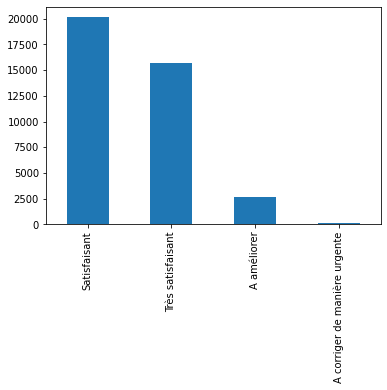

In [6]:
df['Synthese_eval_sanit'].value_counts().plot(kind='bar')

In [7]:
df["APP_Libelle_activite_etablissement"].value_counts().head(20)

Restaurant                                                     14800
Restauration collective                                         6449
Producteur fermier                                              1792
Transformation de lait ou produits laitiers                     1351
Boucherie-Charcuterie                                           1242
Transformation de produits carnés                               1156
Boulangerie-Pâtisserie                                          1054
Alimentation générale                                            938
Chaîne d'abattage de volaille/lagomorphe/petit gibier            936
Purification/Expédition de coquillages                           867
Découpe de viande de boucherie                                   675
Libre service                                                    467
Transport de denrées alimentaires                                427
Traiteur                                                         381
Entreposage de distribution de den

In [8]:
# On limite notre analyse aux restaurants 
df = df[df["APP_Libelle_activite_etablissement"]=="Restaurant"]

In [9]:
# créer une variable latitude et longitude à partir de la colonne geo res
set(type(x) for x in df["geores"].values.tolist())

{float, str}

In [10]:
df["lat"] = df["geores"].map(lambda x: float(x.split(",")[0] if pd.isnull(x)==False else x))
df["long"] = df["geores"].map(lambda x: float(x.split(",")[1] if pd.isnull(x)==False else x))

In [11]:
geo_df = df.dropna(subset =["lat", "long"])

Text(0.5, 1.0, 'Répartition des restaurants notés ')

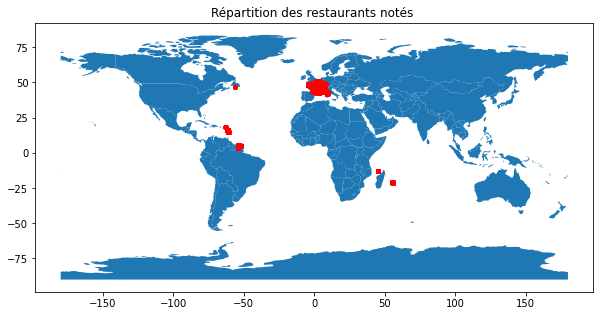

In [12]:
geometry = [Point(xy) for xy in zip(geo_df['long'], geo_df['lat'])]
gdf = GeoDataFrame(geo_df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)
plt.title("Répartition des restaurants notés ")

In [13]:
geo_df_fr = geo_df[(geo_df.lat>41.12)&(geo_df.lat<51.84)&(geo_df.long<11.3)&(geo_df.long>-6.25)]

Text(0.5, 1.0, 'Répartition des notes sanitaires sur le territoire')

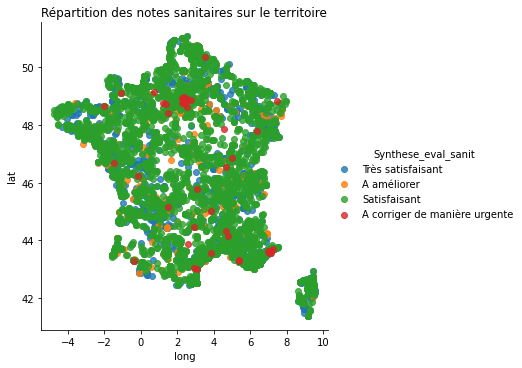

In [14]:
sns.lmplot('long', 'lat', data=geo_df_fr, hue='Synthese_eval_sanit', fit_reg=False)
plt.title("Répartition des notes sanitaires sur le territoire")

## Objectif de travail
Notre but est de contrôler l'inspection des restaurants. On s'est fixé les KPI suivants et on aimerait pouvoir les suivre :
* Nombre de controles mensuels par région, (EST-IL possible de mesurer en pourcentage ?)
* Taux de contrôles à améliorer ou à corriger par rapport aux controles effectués

### Nombre de contrôles par mois par région.
Pour cela il va falloir :
1. Connaître la région à laquelle le restaurant appartient 
2. Calculer le nombre de contrôles mensuels pour chacune des régions
3. Calculer le ratio de controles par rapport au nombre d'habitants 
4. Sortir une liste par région où il n'y a pas assez eu de contrôle mensuels. On pourrait se fixer comme limite minimum qu'il faut 1 controle pour 100 000 habitants tous les mois. 

In [15]:
df_cities = pd.read_csv('../data/cities.csv')
df_departments = pd.read_csv('../data/departments.csv')
df_regions = pd.read_csv('../data/regions.csv')
df_pop_regions = pd.read_csv('../data/pop_regions.csv')

In [16]:
#for further processing we need to change the columns names for region
df_regions.columns= ['id', 'region_code', 'region_name', 'slug']
df_with_regions = pd.merge(df, df_cities, how= 'left', left_on = 'Code_postal', right_on = 'zip_code')
df_with_regions = pd.merge(df_with_regions, df_departments, how= 'left', left_on = 'department_code', right_on = 'code')
df_with_regions = pd.merge(df_with_regions, df_regions, how= 'left', on = 'region_code')

# the problem with this merging is that it generated many duplicates due to small cities having the same zip code
df_with_regions.head()

,APP_Libelle_etablissement,SIRET,Code_postal,Libelle_commune,Numero_inspection,Date_inspection,APP_Libelle_activite_etablissement,Synthese_eval_sanit,Agrement,geores,...,gps_lat,gps_lng,id_y,region_code,code,name_y,slug_y,id,region_name,slug
0,LE GAULOIS,84752155600013,13100.0,AIX EN PROVENCE,2,2019-05-22T13:00:00+02:00,Restaurant,Très satisfaisant,NaN,"43.531956,5.4468",...,43.533834,5.509247,13.0,93,13,Bouches-du-Rhône,bouches du rhone,17.0,Provence-Alpes-Côte d'Azur,provence alpes cote dazur
1,LE GAULOIS,84752155600013,13100.0,AIX EN PROVENCE,2,2019-05-22T13:00:00+02:00,Restaurant,Très satisfaisant,NaN,"43.531956,5.4468",...,43.523233,5.546260,13.0,93,13,Bouches-du-Rhône,bouches du rhone,17.0,Provence-Alpes-Côte d'Azur,provence alpes cote dazur
2,LE GAULOIS,84752155600013,13100.0,AIX EN PROVENCE,2,2019-05-22T13:00:00+02:00,Restaurant,Très satisfaisant,NaN,"43.531956,5.4468",...,43.517019,5.594303,13.0,93,13,Bouches-du-Rhône,bouches du rhone,17.0,Provence-Alpes-Côte d'Azur,provence alpes cote dazur
3,LE GAULOIS,84752155600013,13100.0,AIX EN PROVENCE,2,2019-05-22T13:00:00+02:00,Restaurant,Très satisfaisant,NaN,"43.531956,5.4468",...,43.553539,5.527096,13.0,93,13,Bouches-du-Rhône,bouches du rhone,17.0,Provence-Alpes-Côte d'Azur,provence alpes cote dazur
4,LE GAULOIS,84752155600013,13100.0,AIX EN PROVENCE,2,2019-05-22T13:00:00+02:00,Restaurant,Très satisfaisant,NaN,"43.531956,5.4468",...,43.520782,5.504442,13.0,93,13,Bouches-du-Rhône,bouches du rhone,17.0,Provence-Alpes-Côte d'Azur,provence alpes cote dazur


In [17]:
# it is usefull to check the number of nan in the table
df_with_regions.isna().sum()

APP_Libelle_etablissement                 1
SIRET                                     0
Code_postal                             312
Libelle_commune                           0
Numero_inspection                         0
Date_inspection                           0
APP_Libelle_activite_etablissement        0
Synthese_eval_sanit                       0
Agrement                              55184
geores                                 2200
filtre                                    0
ods_adresse                             782
ods_type_activite                         0
lat                                    2200
long                                   2200
id_x                                     35
department_code                          35
insee_code                              377
zip_code                                347
name_x                                   35
slug_x                                   35
gps_lat                                  35
gps_lng                         

In [18]:
# cleaning of the nan
df_with_regions.dropna(subset=['region_code'], inplace=True)
df_with_regions.isna().sum()

APP_Libelle_etablissement                 1
SIRET                                     0
Code_postal                             312
Libelle_commune                           0
Numero_inspection                         0
Date_inspection                           0
APP_Libelle_activite_etablissement        0
Synthese_eval_sanit                       0
Agrement                              55149
geores                                 2175
filtre                                    0
ods_adresse                             781
ods_type_activite                         0
lat                                    2175
long                                   2175
id_x                                      0
department_code                           0
insee_code                              342
zip_code                                312
name_x                                    0
slug_x                                    0
gps_lat                                   0
gps_lng                         

In [19]:
#keep only original columns + regions
columns = df.columns.tolist()
columns += ['region_name', 'region_code']
df_with_regions = df_with_regions.filter(items=columns)
#remove duplicates
df_with_regions.drop_duplicates(ignore_index=True, inplace= True)

In [20]:
#We need a tracking to the month, so we need to work a bit on the time values
from datetime import datetime
def transform_date (string_date):
  datestr = string_date.split('+')[0] #remove the last bit of the data (ms) we don't need that
  return datetime.strptime(datestr,'%Y-%m-%dT%H:%M:%S') #convert the data into datetime object
df_with_regions['Date_inspection'] = df_with_regions['Date_inspection'].apply(lambda x : transform_date(x))
df_with_regions.head()

,APP_Libelle_etablissement,SIRET,Code_postal,Libelle_commune,Numero_inspection,Date_inspection,APP_Libelle_activite_etablissement,Synthese_eval_sanit,Agrement,geores,filtre,ods_adresse,ods_type_activite,lat,long,region_name,region_code
0,LE GAULOIS,84752155600013,13100.0,AIX EN PROVENCE,2,2019-05-22 13:00:00,Restaurant,Très satisfaisant,NaN,"43.531956,5.4468",Restaurant,34 rue Jacques de la Roque,Autres,43.531956,5.446800,Provence-Alpes-Côte d'Azur,93
1,LE CARDEUR DE BACCHUS,82183401700013,13100.0,AIX EN PROVENCE,3,2019-05-24 13:30:00,Restaurant,Très satisfaisant,NaN,"43.529969,5.446457",Restaurant,14 Forum des cardeurs,Autres,43.529969,5.446457,Provence-Alpes-Côte d'Azur,93
2,CARREFOUR BAR,40829886700016,13100.0,AIX EN PROVENCE,6,2019-05-21 12:30:00,Restaurant,Très satisfaisant,NaN,"43.525265,5.453713",Restaurant,2 rue Roux Alpherand,Autres,43.525265,5.453713,Provence-Alpes-Côte d'Azur,93
3,LES FILS A MAMAN,83283779300021,13100.0,AIX EN PROVENCE,0,2019-06-13 13:45:00,Restaurant,Très satisfaisant,NaN,"43.528498,5.447157",Restaurant,42 rue Verrerie,Autres,43.528498,5.447157,Provence-Alpes-Côte d'Azur,93
4,LA CAVE DES OURS,84995458100013,13100.0,AIX EN PROVENCE,4,2019-06-13 13:30:00,Restaurant,Très satisfaisant,NaN,"43.532264,5.44666",Restaurant,20 rue Jacques de la Roque,Autres,43.532264,5.446660,Provence-Alpes-Côte d'Azur,93


In [21]:
# Group the data by month and by region 
grouped = df_with_regions.groupby([pd.Grouper(key = 'Date_inspection', freq = 'm'),'region_code'])['Synthese_eval_sanit'].count()

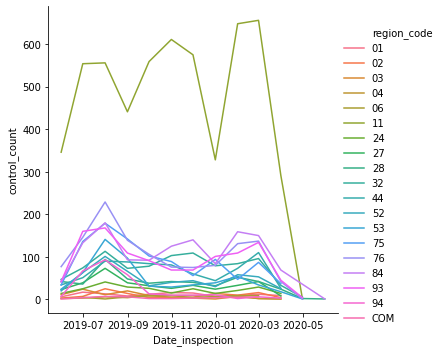

In [22]:
#Before ploting we need to do some transforming of our 
df_inspections = grouped.unstack('region_code').reset_index().melt('Date_inspection', var_name = 'region_code', value_name = 'control_count')
sns.relplot(x = 'Date_inspection', y= 'control_count', hue = 'region_code', data= df_inspections, kind = 'line')

In [23]:
df_pop_regions.head()

,Code région,Nom de la région,Nombre d'arrondissements,Nombre de cantons,Nombre de communes,Population municipale,Population totale
0,84,Auvergne-Rhône-Alpes,39,241.0,4030,7948287,8120668
1,27,Bourgogne-Franche-Comté,24,152.0,3704,2811423,2885864
2,53,Bretagne,15,102.0,1208,3318904,3407564
3,24,Centre-Val de Loire,20,102.0,1758,2576252,2634852
4,94,Corse,5,26.0,360,334938,340233


In [24]:
# at this point it would be interesting to link with the region population
#clean 'COM' region
df_inspections = df_inspections[df_inspections.region_code != 'COM']
# convert region_codes to int in order to merge
df_inspections['region_code_int'] = df_inspections['region_code'].astype('int64')
# merge the inspection list with the population data
df_inspections = pd.merge(df_inspections, df_pop_regions, how= 'left', left_on='region_code_int', right_on='Code région')
# this is what we obtained :
df_inspections.head()

/home/robin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Date_inspection,region_code,control_count,region_code_int,Code région,Nom de la région,Nombre d'arrondissements,Nombre de cantons,Nombre de communes,Population municipale,Population totale
0,2019-05-31,01,6.0,1,1.0,Guadeloupe,2.0,21.0,32.0,390253.0,396153.0
1,2019-06-30,01,17.0,1,1.0,Guadeloupe,2.0,21.0,32.0,390253.0,396153.0
2,2019-07-31,01,13.0,1,1.0,Guadeloupe,2.0,21.0,32.0,390253.0,396153.0
3,2019-08-31,01,8.0,1,1.0,Guadeloupe,2.0,21.0,32.0,390253.0,396153.0
4,2019-09-30,01,12.0,1,1.0,Guadeloupe,2.0,21.0,32.0,390253.0,396153.0


In [25]:
# calculate the ratio for the population 
df_inspections['ratio_control_for100000'] = df_inspections['control_count'] / df_inspections['Population totale'] * 100000

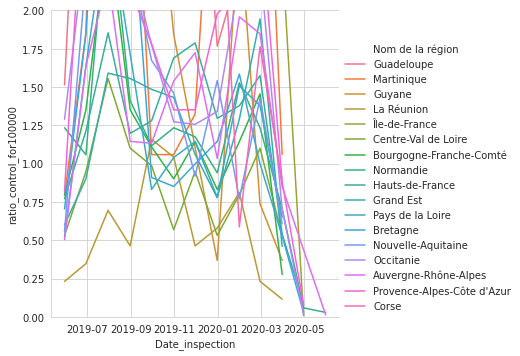

In [26]:
sns.set_style("whitegrid")
g = sns.relplot(x = 'Date_inspection', y= 'ratio_control_for100000', hue = 'Nom de la région', data= df_inspections, kind = 'line')
g.set(ylim=(0, 2))

In [27]:
# let's have a look at the regions that did less that 1 inspection per 100 000 inhabitants 
df_few_inspections = df_inspections[df_inspections['ratio_control_for100000'] < 1.0]
df_few_inspections.head()

,Date_inspection,region_code,control_count,region_code_int,Code région,Nom de la région,Nombre d'arrondissements,Nombre de cantons,Nombre de communes,Population municipale,Population totale,ratio_control_for100000
13,2019-05-31,02,3.0,2,2.0,Martinique,4.0,NaN,34.0,372594.0,377711.0,0.794258
33,2019-12-31,03,1.0,3,3.0,Guyane,2.0,NaN,22.0,268700.0,271124.0,0.368835
35,2020-02-29,03,2.0,3,3.0,Guyane,2.0,NaN,22.0,268700.0,271124.0,0.737670
36,2020-03-31,03,1.0,3,3.0,Guyane,2.0,NaN,22.0,268700.0,271124.0,0.368835
39,2019-05-31,04,2.0,4,4.0,La Réunion,4.0,25.0,24.0,853659.0,863063.0,0.231733


In [28]:
df_few_inspections.groupby(['Nom de la région'])['ratio_control_for100000'].count().sort_values(ascending = False)

Nom de la région
La Réunion                    9
Centre-Val de Loire           8
Bretagne                      7
Pays de la Loire              4
Nouvelle-Aquitaine            4
Normandie                     4
Grand Est                     4
Bourgogne-Franche-Comté       4
Provence-Alpes-Côte d'Azur    3
Hauts-de-France               3
Guyane                        3
Auvergne-Rhône-Alpes          3
Occitanie                     2
Corse                         2
Île-de-France                 1
Martinique                    1
Name: ratio_control_for100000, dtype: int64

In [29]:
# let's check that everyone was indeed inspecting stuff
df_inspections.groupby(['Nom de la région'])['ratio_control_for100000'].count().sort_values(ascending = False)

Nom de la région
Normandie                     13
Île-de-France                 12
Bretagne                      12
Provence-Alpes-Côte d'Azur    12
Hauts-de-France               12
Occitanie                     12
Auvergne-Rhône-Alpes          12
Nouvelle-Aquitaine            11
Martinique                    11
La Réunion                    11
Guyane                        11
Guadeloupe                    11
Grand Est                     11
Corse                         11
Centre-Val de Loire           11
Pays de la Loire              11
Bourgogne-Franche-Comté       11
Name: ratio_control_for100000, dtype: int64

In [30]:
# let's check that everyone was indeed inspecting stuff
df_inspections.groupby(['Date_inspection'])['ratio_control_for100000'].count().sort_values(ascending = False)

Date_inspection
2020-03-31    17
2020-02-29    17
2020-01-31    17
2019-12-31    17
2019-11-30    17
2019-10-31    17
2019-09-30    17
2019-08-31    17
2019-07-31    17
2019-06-30    17
2019-05-31    17
2020-04-30     6
2020-05-31     2
Name: ratio_control_for100000, dtype: int64

In [31]:
# looks like that due to the coronavirus, people were not inspecting in april or may 2020: let's remove these months for the analysis
df_inspections = df_inspections[df_inspections['Date_inspection'] < '2020-04']
# let's check that we removed everything 
df_inspections.groupby(['Date_inspection'])['ratio_control_for100000'].count().sort_values(ascending = False)

Date_inspection
2020-03-31    17
2020-02-29    17
2020-01-31    17
2019-12-31    17
2019-11-30    17
2019-10-31    17
2019-09-30    17
2019-08-31    17
2019-07-31    17
2019-06-30    17
2019-05-31    17
Name: ratio_control_for100000, dtype: int64

In [32]:
# let's have a look at the regions that did less that 1 inspection per 100 000 inhabitants 
df_few_inspections = df_inspections[df_inspections['ratio_control_for100000'] < 1.0]
df_few_inspections.head()

,Date_inspection,region_code,control_count,region_code_int,Code région,Nom de la région,Nombre d'arrondissements,Nombre de cantons,Nombre de communes,Population municipale,Population totale,ratio_control_for100000
13,2019-05-31,02,3.0,2,2.0,Martinique,4.0,NaN,34.0,372594.0,377711.0,0.794258
33,2019-12-31,03,1.0,3,3.0,Guyane,2.0,NaN,22.0,268700.0,271124.0,0.368835
35,2020-02-29,03,2.0,3,3.0,Guyane,2.0,NaN,22.0,268700.0,271124.0,0.737670
36,2020-03-31,03,1.0,3,3.0,Guyane,2.0,NaN,22.0,268700.0,271124.0,0.368835
39,2019-05-31,04,2.0,4,4.0,La Réunion,4.0,25.0,24.0,853659.0,863063.0,0.231733


In [33]:
# let's check that everyone was indeed inspecting stuff
df_inspections.groupby(['Nom de la région'])['ratio_control_for100000'].count().sort_values(ascending = False)

Nom de la région
Île-de-France                 11
Guyane                        11
Bourgogne-Franche-Comté       11
Bretagne                      11
Centre-Val de Loire           11
Corse                         11
Grand Est                     11
Guadeloupe                    11
Hauts-de-France               11
Provence-Alpes-Côte d'Azur    11
La Réunion                    11
Martinique                    11
Normandie                     11
Nouvelle-Aquitaine            11
Occitanie                     11
Pays de la Loire              11
Auvergne-Rhône-Alpes          11
Name: ratio_control_for100000, dtype: int64

In [34]:
# let's have a look at the regions that did less that 1 inspection per 100 000 inhabitants 
df_few_inspections = df_inspections[df_inspections['ratio_control_for100000'] < 1.0]
df_few_inspections.groupby(['Nom de la région'])['ratio_control_for100000'].count().sort_values(ascending = False)

Nom de la région
La Réunion                    9
Centre-Val de Loire           8
Bretagne                      6
Pays de la Loire              4
Nouvelle-Aquitaine            4
Grand Est                     4
Bourgogne-Franche-Comté       4
Guyane                        3
Provence-Alpes-Côte d'Azur    2
Normandie                     2
Hauts-de-France               2
Corse                         2
Auvergne-Rhône-Alpes          2
Occitanie                     1
Martinique                    1
Name: ratio_control_for100000, dtype: int64

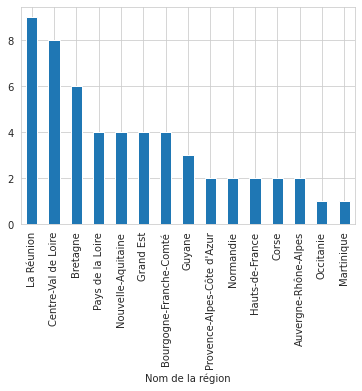

In [35]:
data = df_few_inspections.groupby(['Nom de la région'])['ratio_control_for100000'].count().sort_values(ascending = False)
data.plot(kind = 'bar')

In [36]:
#We might want to see this on a timescale
grouped = df_few_inspections.groupby(['Date_inspection','Nom de la région'])['ratio_control_for100000'].count().sort_values(ascending = False)
#Before ploting we need to do some transforming of our 
df_grouped_few_inspections = grouped.unstack('Nom de la région').reset_index().melt('Date_inspection', var_name = 'Nom de la région', value_name = 'few_control_count')
grouped.unstack('Nom de la région').reset_index()

Nom de la région,Date_inspection,Auvergne-Rhône-Alpes,Bourgogne-Franche-Comté,Bretagne,Centre-Val de Loire,Corse,Grand Est,Guyane,Hauts-de-France,La Réunion,Martinique,Normandie,Nouvelle-Aquitaine,Occitanie,Pays de la Loire,Provence-Alpes-Côte d'Azur
0,2019-05-31,1.0,1.0,1.0,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,1.0
1,2019-06-30,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-09-30,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
5,2019-10-31,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2019-11-30,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN
7,2019-12-31,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN
8,2020-01-31,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN
9,2020-02-29,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df_grouped_few_inspections = grouped.unstack('Nom de la région').reset_index().fillna(value = 0).melt('Date_inspection', var_name = 'Nom de la région', value_name = 'few_control_count')
df_grouped_few_inspections.head()

,Date_inspection,Nom de la région,few_control_count
0,2019-05-31,Auvergne-Rhône-Alpes,1.0
1,2019-06-30,Auvergne-Rhône-Alpes,0.0
2,2019-07-31,Auvergne-Rhône-Alpes,0.0
3,2019-08-31,Auvergne-Rhône-Alpes,0.0
4,2019-09-30,Auvergne-Rhône-Alpes,0.0


In [38]:
df_grouped_few_inspections = grouped.unstack('Nom de la région').reset_index().fillna(value = 0)
df_grouped_few_inspections.head()

Nom de la région,Date_inspection,Auvergne-Rhône-Alpes,Bourgogne-Franche-Comté,Bretagne,Centre-Val de Loire,Corse,Grand Est,Guyane,Hauts-de-France,La Réunion,Martinique,Normandie,Nouvelle-Aquitaine,Occitanie,Pays de la Loire,Provence-Alpes-Côte d'Azur
0,2019-05-31,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
1,2019-06-30,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-07-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-09-30,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


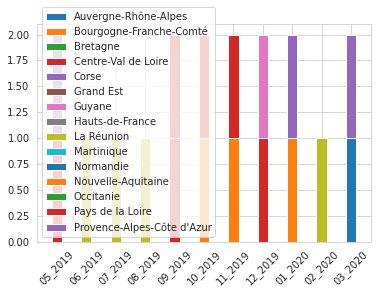

In [39]:
fig, ax = plt.subplots()
#convert the date in some strings
labels = [i.strftime('%m_%Y') for i in df_grouped_few_inspections['Date_inspection']]
width = 0.35     # the width of the bars: can also be len(x) sequence

regions = df_grouped_few_inspections.columns[1:].tolist()
bot = np.zeros(df_grouped_few_inspections.shape[0])
for r in regions:
    ax.bar(labels, df_grouped_few_inspections[r], width, bottom = bot, label=r)
    bot = df_grouped_few_inspections[r]


#ax.set_ylabel('Scores')
#ax.set_title('Scores by group and gender')
ax.legend()

plt.xticks(rotation=45)
plt.show()

Maintenant on veut pouvoir représenter les résultats des controles dans le temps


In [40]:
df.head()

,APP_Libelle_etablissement,SIRET,Code_postal,Libelle_commune,Numero_inspection,Date_inspection,APP_Libelle_activite_etablissement,Synthese_eval_sanit,Agrement,geores,filtre,ods_adresse,ods_type_activite,lat,long
0,LE GAULOIS,84752155600013,13100.0,AIX EN PROVENCE,2,2019-05-22T13:00:00+02:00,Restaurant,Très satisfaisant,NaN,"43.531956,5.4468",Restaurant,34 rue Jacques de la Roque,Autres,43.531956,5.446800
1,LE CARDEUR DE BACCHUS,82183401700013,13100.0,AIX EN PROVENCE,3,2019-05-24T13:30:00+02:00,Restaurant,Très satisfaisant,NaN,"43.529969,5.446457",Restaurant,14 Forum des cardeurs,Autres,43.529969,5.446457
2,CARREFOUR BAR,40829886700016,13100.0,AIX EN PROVENCE,6,2019-05-21T12:30:00+02:00,Restaurant,Très satisfaisant,NaN,"43.525265,5.453713",Restaurant,2 rue Roux Alpherand,Autres,43.525265,5.453713
3,LES FILS A MAMAN,83283779300021,13100.0,AIX EN PROVENCE,0,2019-06-13T13:45:00+02:00,Restaurant,Très satisfaisant,NaN,"43.528498,5.447157",Restaurant,42 rue Verrerie,Autres,43.528498,5.447157
5,LA CAVE DES OURS,84995458100013,13100.0,AIX EN PROVENCE,4,2019-06-13T13:30:00+02:00,Restaurant,Très satisfaisant,NaN,"43.532264,5.44666",Restaurant,20 rue Jacques de la Roque,Autres,43.532264,5.446660


In [41]:
# retransformons la date 
from datetime import datetime
def transform_date (string_date):
  datestr = string_date.split('+')[0] #remove the last bit of the data (ms) we don't need that
  return datetime.strptime(datestr,'%Y-%m-%dT%H:%M:%S') #convert the data into datetime object
df['Date_inspection'] = df['Date_inspection'].apply(lambda x : transform_date(x))
# looks like that due to the coronavirus, people were not inspecting in april or may 2020: let's remove these months for the analysis
df = df[df['Date_inspection'] < '2020-04']
df.head()


,APP_Libelle_etablissement,SIRET,Code_postal,Libelle_commune,Numero_inspection,Date_inspection,APP_Libelle_activite_etablissement,Synthese_eval_sanit,Agrement,geores,filtre,ods_adresse,ods_type_activite,lat,long
0,LE GAULOIS,84752155600013,13100.0,AIX EN PROVENCE,2,2019-05-22 13:00:00,Restaurant,Très satisfaisant,NaN,"43.531956,5.4468",Restaurant,34 rue Jacques de la Roque,Autres,43.531956,5.446800
1,LE CARDEUR DE BACCHUS,82183401700013,13100.0,AIX EN PROVENCE,3,2019-05-24 13:30:00,Restaurant,Très satisfaisant,NaN,"43.529969,5.446457",Restaurant,14 Forum des cardeurs,Autres,43.529969,5.446457
2,CARREFOUR BAR,40829886700016,13100.0,AIX EN PROVENCE,6,2019-05-21 12:30:00,Restaurant,Très satisfaisant,NaN,"43.525265,5.453713",Restaurant,2 rue Roux Alpherand,Autres,43.525265,5.453713
3,LES FILS A MAMAN,83283779300021,13100.0,AIX EN PROVENCE,0,2019-06-13 13:45:00,Restaurant,Très satisfaisant,NaN,"43.528498,5.447157",Restaurant,42 rue Verrerie,Autres,43.528498,5.447157
5,LA CAVE DES OURS,84995458100013,13100.0,AIX EN PROVENCE,4,2019-06-13 13:30:00,Restaurant,Très satisfaisant,NaN,"43.532264,5.44666",Restaurant,20 rue Jacques de la Roque,Autres,43.532264,5.446660


In [42]:
grouped = df.groupby([pd.Grouper(key = 'Date_inspection', freq = 'm'), 'Synthese_eval_sanit'])['filtre'].count()
#Before ploting we need to do some transforming of our 
grouped.unstack('Synthese_eval_sanit').reset_index().fillna(value = 0)

Synthese_eval_sanit,Date_inspection,A améliorer,A corriger de manière urgente,Satisfaisant,Très satisfaisant
0,2019-05-31,32,4,463,281
1,2019-06-30,79,6,977,548
2,2019-07-31,106,8,1259,748
3,2019-08-31,78,6,913,483
4,2019-09-30,90,8,838,395
5,2019-10-31,83,5,868,405
6,2019-11-30,92,4,814,402
7,2019-12-31,92,8,598,304
8,2020-01-31,158,6,868,481
9,2020-02-29,226,12,884,502


In [49]:
df_eval = grouped.unstack('Synthese_eval_sanit').reset_index().fillna(value = 0)
# All numerical columns
num_cols = [col for col in df_eval.columns if df_eval[col].dtype == "int"]
df_eval['Total inspections'] = df_eval.sum(axis = 1)
for n in num_cols:
    df_eval[n+'_ratio'] = df_eval[n]/df_eval['Total inspections']*100
df_eval

Synthese_eval_sanit,Date_inspection,A améliorer,A corriger de manière urgente,Satisfaisant,Très satisfaisant,Total inspections,A améliorer_ratio,A corriger de manière urgente_ratio,Satisfaisant_ratio,Très satisfaisant_ratio
0,2019-05-31,32,4,463,281,780,4.102564,0.512821,59.358974,36.025641
1,2019-06-30,79,6,977,548,1610,4.906832,0.372671,60.683230,34.037267
2,2019-07-31,106,8,1259,748,2121,4.997643,0.377181,59.358793,35.266384
3,2019-08-31,78,6,913,483,1480,5.270270,0.405405,61.689189,32.635135
4,2019-09-30,90,8,838,395,1331,6.761833,0.601052,62.960180,29.676935
5,2019-10-31,83,5,868,405,1361,6.098457,0.367377,63.776635,29.757531
6,2019-11-30,92,4,814,402,1312,7.012195,0.304878,62.042683,30.640244
7,2019-12-31,92,8,598,304,1002,9.181637,0.798403,59.680639,30.339321
8,2020-01-31,158,6,868,481,1513,10.442829,0.396563,57.369465,31.791143
9,2020-02-29,226,12,884,502,1624,13.916256,0.738916,54.433498,30.911330


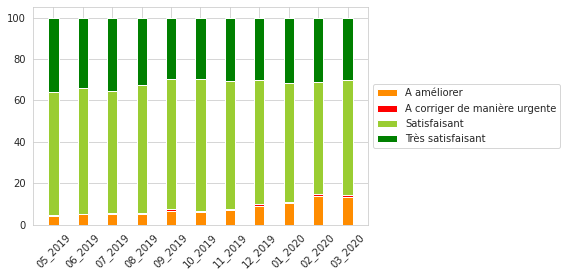

In [50]:
fig, ax = plt.subplots()
#convert the date in some strings
labels = [i.strftime('%m_%Y') for i in df_eval['Date_inspection']]
width = 0.35     # the width of the bars: can also be len(x) sequence

color_dict = {'A améliorer':'darkorange',
 'A corriger de manière urgente': 'red',
 'Satisfaisant':'yellowgreen',
 'Très satisfaisant':'green'}

bot = np.zeros(df_eval.shape[0])
for n in num_cols:
    m = n+ '_ratio'
    ax.bar(labels, df_eval[m], width, bottom = bot, label=n , color = color_dict[n])
    bot += df_eval[m]


#ax.set_ylabel('Scores')
#ax.set_title('Scores by group and gender')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(rotation=45)
plt.show()